<a href="https://colab.research.google.com/github/Paolino1994/Deep-Learning/blob/main/Examen_Final_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
import numpy as np
import random
import matplotlib.pyplot as plt
import pickle
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torch import Tensor
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
device

'cuda'

# Punto 1
Descargar el dataset desde el siguiente link. Entrenar el modelo propuesto a continuación de este enunciado. El modelo está haciendo underfitting, overfitting o un fit correcto. ¿Por qué? Explicar el procedimiento realizado.


In [6]:
ds=pd.read_csv("drive/MyDrive/dataset_1.csv")
ds = ds.rename(columns = {'# X':"X", "Y":"y"})

In [7]:
ds.head()

,X,y
0,1.791979,4.952906
1,0.846885,1.424248
2,1.000300,0.454364
3,1.884188,6.681510
4,0.889089,1.211691


In [8]:
X = ds[["X"]]
Y = ds[["y"]]

In [9]:
random_state=65

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70, random_state=random_state)
X_train=np.array(X_train).flatten()
X_test=np.array(X_test).flatten()
Y_train=np.array(Y_train).flatten()
Y_test=np.array(Y_test).flatten()

In [11]:
learningRate=0.0001
epochs=300
w1=0
w2=0
bias=0
errorList=[]
validErrorList=[]

In [12]:
for epoch in range(epochs):
  currentError=0
  epochError=0
  for element in range(len(X_train)):
    x=X_train[element]
    y=Y_train[element]
    #Forward
    x1, x2, x3 = x, x**2, x**3
    pred=w1*x3 + w2*x2 + w1*x1 + bias
    error = y - pred
    #print(x,y,x1, x2, x3,w1,w2)
    epochError = epochError+error**2
    

    
    
    #Back
    d_prediction = - 2 * error
    w1_loss = (d_prediction * (x3 + x1)).sum(axis=0)
    w2_loss = (d_prediction * x2).sum(axis=0)
    bias_loss = d_prediction.sum(axis=0)

    

    #Weight
    w1 -= learningRate * w1_loss 
    w2 -= learningRate * w2_loss 
    bias -= learningRate * bias_loss 

  #Validation
  validError=0
  for element in range(len(X_test)):
    xT=X_test[element]
    yT=Y_test[element]
    x1, x2, x3 = xT, xT**2, xT**3
    pred=w1*x3 + w2*x2 + w1*x1 + bias
    error = yT - pred
    validError = validError+error**2

  validErrorList.append(validError/len(X_test))
  errorList.append(epochError/len(X_train))
  print(f"Epoch {epoch} error {errorList[-1]} valid error {validErrorList[-1]}")


    


Epoch 0 error 0.771982807541607 valid error 0.5964488313947218
Epoch 1 error 0.5856022942119175 valid error 0.5768729532367709
Epoch 2 error 0.5744097557550619 valid error 0.5699397914961648
Epoch 3 error 0.5701628353622279 valid error 0.566743310852872
Epoch 4 error 0.5679095499761186 valid error 0.5647082354155423
Epoch 5 error 0.5662521758534642 valid error 0.5630713134830193
Epoch 6 error 0.5647937533287362 valid error 0.5615966159589829
Epoch 7 error 0.5634200296090396 valid error 0.5602061488865093
Epoch 8 error 0.562097104291428 valid error 0.5588714963523564
Epoch 9 error 0.5608141771703455 valid error 0.5575809326101244
Epoch 10 error 0.5595672309463476 valid error 0.556328885750394
Epoch 11 error 0.558354318557226 valid error 0.5551122925356676
Epoch 12 error 0.5571741698012919 valid error 0.5539292130027778
Epoch 13 error 0.5560257627291212 valid error 0.5527782507746652
Epoch 14 error 0.5549081833630377 valid error 0.5516582897484968
Epoch 15 error 0.5538205756030734 valid 

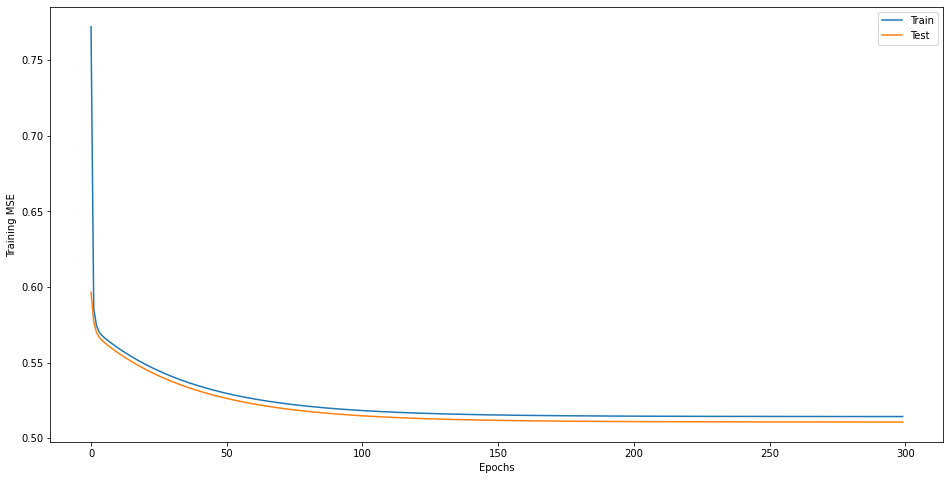

In [13]:
plt.figure(figsize=(16,8))
plt.plot(errorList, label='Train')
plt.plot(validErrorList, label='Test')
plt.xlabel("Epochs")
plt.ylabel("Training MSE")
plt.legend()
plt.show()

En este caso estamos seguros que nuestro modelo no have overfitting ya que la loss de nustro test nunca vuelve a ascender, podemos revisar cuales son los resultados para comparar con nuestro Y original

In [14]:
x1, x2, x3 = X_test, X_test**2, X_test**3
predTest=w1*x3 + w2*x2 + w1*x1 + bias

x1, x2, x3 = X_train, X_train**2, X_train**3
predTrain=w1*x3 + w2*x2 + w1*x1 + bias

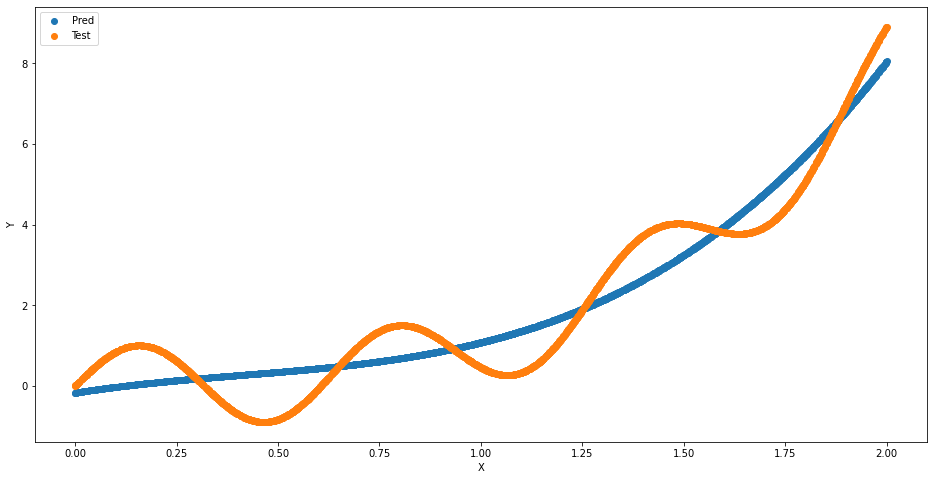

In [15]:
plt.figure(figsize=(16,8))
plt.scatter(X_test,predTest, label='Pred')
plt.scatter(X_test,Y_test, label='Test')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

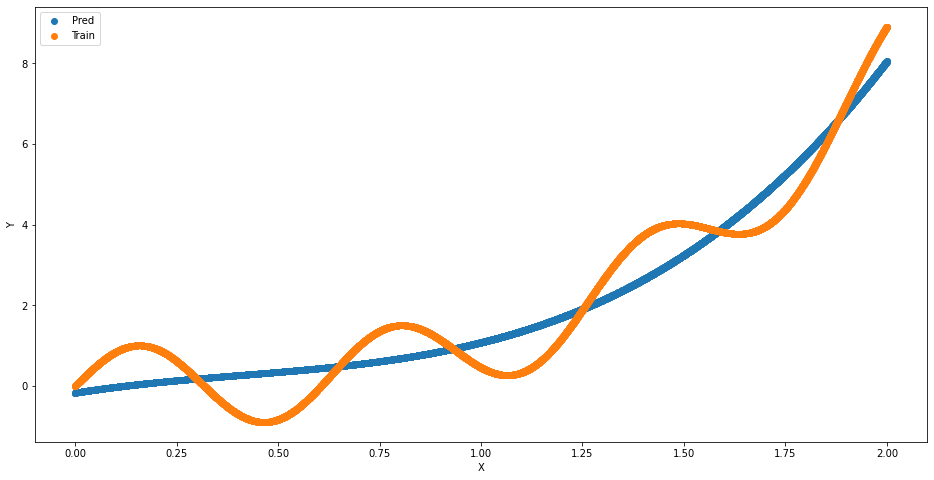

In [16]:
plt.figure(figsize=(16,8))
plt.scatter(X_train,predTrain, label='Pred')
plt.scatter(X_train,Y_train, label='Train')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

### Si bien nuestro modelo sigue una forma similar a la data original, podemos decir que el modelo esta UNDERFITEADO ya que ni siquiera sobre el set de train podemos ver que fitee correctamente

# Punto 2
Utilizando el mismo dataset que en el link anterior, diseñar una red neuronal que haga un overfitting sobre el dataset. ¿Cómo saben que la red neuronal está haciendo overfitting? Agregar regularización y encontrar los parámetros correctos para lograr un buen fit. Explicar el procedimiento realizado.


In [17]:
train_dataset_fulll = TensorDataset( Tensor(X_train), Tensor(Y_train) )
test_dataset_fulll = TensorDataset( Tensor(X_test), Tensor(Y_test) )


In [18]:
Y_train.shape

(7000,)

In [19]:
dataloader = {
    'train': torch.utils.data.DataLoader(train_dataset_fulll, batch_size=64, shuffle=True, pin_memory=True),
    'test': torch.utils.data.DataLoader(test_dataset_fulll, batch_size=64, shuffle=False, pin_memory=True)
}

In [20]:
train_loader = torch.utils.data.DataLoader(train_dataset_fulll, batch_size=64, shuffle=True, pin_memory=True)
test_loader =  torch.utils.data.DataLoader(test_dataset_fulll, batch_size=64, shuffle=False, pin_memory=True)


In [21]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 120)
        self.fc2 = nn.Linear(120, 250)
        self.fc3 = nn.Linear(250, 120)
        self.fc4 = nn.Linear(120, 120) 
        self.fc5 = nn.Linear(120, 84)
        self.fc6 = nn.Linear(84, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return x





In [22]:
net = Net()
print(net)
learning_rate=0.001

Net(
  (fc1): Linear(in_features=1, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=250, bias=True)
  (fc3): Linear(in_features=250, out_features=120, bias=True)
  (fc4): Linear(in_features=120, out_features=120, bias=True)
  (fc5): Linear(in_features=120, out_features=84, bias=True)
  (fc6): Linear(in_features=84, out_features=1, bias=True)
)


## NNet sin regularizaion

In [23]:
#optimizer=torch.optim.Adam(net.parameters(), lr=learning_rate,weight_decay=1e-5)
optimizer=torch.optim.Adam(net.parameters(), lr=learning_rate)
criterion=nn.MSELoss()

In [24]:
def early_stopping(train_loss, validation_loss, min_delta, tolerance):

    counter = 0
    if (validation_loss - train_loss) > min_delta:
        counter +=1
        if counter >= tolerance:
          return True

In [25]:
def fit(model, dataloader,criterion,optimizer, epochs=5):
    model.to(device)
    losses = []
    val_losses = []
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            #print(X.size())
            X, y = batch
            #X = X.float()
            X, y = X.to(device), y.to(device)

            optimizer.zero_grad()
            #y_hat = model(X)
            y_hat = model(X.resize(X.size()[0],1))            
            loss = criterion(y_hat, y.resize(y.size()[0],1))
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            ####
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                #X = X.float()
                X, y = X.to(device), y.to(device)
                #y_hat = model(X)
                y_hat = model(X.resize(X.size()[0],1))
                loss = criterion(y_hat, y.resize(y.size()[0],1))
                val_loss.append(loss.item())
         # early stopping
        #if early_stopping(train_loss[-1], val_loss[-1], min_delta=10, tolerance = 20):
        #  print("We are at epoch:", epoch)
        #  break
        losses.append(np.mean(train_loss))
        val_losses.append(np.mean(val_loss))
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f}")
    return losses,val_losses

In [26]:
losses,val_losses=fit(net, dataloader ,criterion , optimizer, epochs=100)

  0%|          | 0/110 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:586: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
100%|██████████| 47/47 [00:00<00:00, 737.31it/s]


Epoch 1/100 loss 2.09048 val_loss 0.47810


100%|██████████| 47/47 [00:00<00:00, 508.15it/s]


Epoch 2/100 loss 0.39967 val_loss 0.33590


100%|██████████| 47/47 [00:00<00:00, 278.88it/s]


Epoch 3/100 loss 0.32217 val_loss 0.27855


100%|██████████| 47/47 [00:00<00:00, 1173.48it/s]


Epoch 4/100 loss 0.26390 val_loss 0.39936


100%|██████████| 47/47 [00:00<00:00, 1006.06it/s]


Epoch 5/100 loss 0.25605 val_loss 0.31468


100%|██████████| 47/47 [00:00<00:00, 662.12it/s]


Epoch 6/100 loss 0.24975 val_loss 0.22652


100%|██████████| 47/47 [00:00<00:00, 434.47it/s]


Epoch 7/100 loss 0.23938 val_loss 0.22302


100%|██████████| 47/47 [00:00<00:00, 1094.37it/s]


Epoch 8/100 loss 0.24058 val_loss 0.22224


100%|██████████| 47/47 [00:00<00:00, 1070.84it/s]


Epoch 9/100 loss 0.25835 val_loss 0.24674


100%|██████████| 47/47 [00:00<00:00, 1055.98it/s]


Epoch 10/100 loss 0.24089 val_loss 0.27219


100%|██████████| 47/47 [00:00<00:00, 1064.68it/s]


Epoch 11/100 loss 0.23895 val_loss 0.23219


100%|██████████| 47/47 [00:00<00:00, 892.26it/s]


Epoch 12/100 loss 0.21277 val_loss 0.22855


100%|██████████| 47/47 [00:00<00:00, 1055.16it/s]


Epoch 13/100 loss 0.15754 val_loss 0.14819


100%|██████████| 47/47 [00:00<00:00, 1102.44it/s]


Epoch 14/100 loss 0.04667 val_loss 0.00590


100%|██████████| 47/47 [00:00<00:00, 1084.19it/s]


Epoch 15/100 loss 0.00176 val_loss 0.00042


100%|██████████| 47/47 [00:00<00:00, 1156.26it/s]


Epoch 16/100 loss 0.00026 val_loss 0.00019


100%|██████████| 47/47 [00:00<00:00, 1019.14it/s]


Epoch 17/100 loss 0.00025 val_loss 0.00139


100%|██████████| 47/47 [00:00<00:00, 923.25it/s]


Epoch 18/100 loss 0.00033 val_loss 0.00098


100%|██████████| 47/47 [00:00<00:00, 1062.47it/s]


Epoch 19/100 loss 0.00036 val_loss 0.00034


100%|██████████| 47/47 [00:00<00:00, 1089.27it/s]


Epoch 20/100 loss 0.00024 val_loss 0.00022


100%|██████████| 47/47 [00:00<00:00, 1097.00it/s]


Epoch 21/100 loss 0.00031 val_loss 0.00035


100%|██████████| 47/47 [00:00<00:00, 1104.93it/s]


Epoch 22/100 loss 0.00024 val_loss 0.00071


100%|██████████| 47/47 [00:00<00:00, 1071.08it/s]


Epoch 23/100 loss 0.00069 val_loss 0.00048


100%|██████████| 47/47 [00:00<00:00, 1095.67it/s]


Epoch 24/100 loss 0.00071 val_loss 0.00021


100%|██████████| 47/47 [00:00<00:00, 1087.72it/s]


Epoch 25/100 loss 0.00043 val_loss 0.00123


100%|██████████| 47/47 [00:00<00:00, 1078.72it/s]


Epoch 26/100 loss 0.00149 val_loss 0.01178


100%|██████████| 47/47 [00:00<00:00, 1053.47it/s]


Epoch 27/100 loss 0.00625 val_loss 0.00034


100%|██████████| 47/47 [00:00<00:00, 1047.67it/s]


Epoch 28/100 loss 0.00591 val_loss 0.00127


100%|██████████| 47/47 [00:00<00:00, 1040.30it/s]


Epoch 29/100 loss 0.00076 val_loss 0.00053


100%|██████████| 47/47 [00:00<00:00, 1032.88it/s]


Epoch 30/100 loss 0.00072 val_loss 0.00029


100%|██████████| 47/47 [00:00<00:00, 1005.92it/s]


Epoch 31/100 loss 0.00127 val_loss 0.00098


100%|██████████| 47/47 [00:00<00:00, 737.99it/s]


Epoch 32/100 loss 0.00085 val_loss 0.00025


100%|██████████| 47/47 [00:00<00:00, 699.30it/s]


Epoch 33/100 loss 0.00041 val_loss 0.00042


100%|██████████| 47/47 [00:00<00:00, 660.47it/s]


Epoch 34/100 loss 0.00251 val_loss 0.00275


100%|██████████| 47/47 [00:00<00:00, 635.86it/s]


Epoch 35/100 loss 0.00119 val_loss 0.00032


100%|██████████| 47/47 [00:00<00:00, 704.06it/s]


Epoch 36/100 loss 0.00674 val_loss 0.06213


100%|██████████| 47/47 [00:00<00:00, 1021.68it/s]


Epoch 37/100 loss 0.01511 val_loss 0.00078


100%|██████████| 47/47 [00:00<00:00, 1000.83it/s]


Epoch 38/100 loss 0.00045 val_loss 0.00021


100%|██████████| 47/47 [00:00<00:00, 1079.90it/s]


Epoch 39/100 loss 0.00039 val_loss 0.00149


100%|██████████| 47/47 [00:00<00:00, 1033.95it/s]


Epoch 40/100 loss 0.00451 val_loss 0.00990


100%|██████████| 47/47 [00:00<00:00, 1049.31it/s]


Epoch 41/100 loss 0.00171 val_loss 0.00159


100%|██████████| 47/47 [00:00<00:00, 946.57it/s]


Epoch 42/100 loss 0.00053 val_loss 0.00045


100%|██████████| 47/47 [00:00<00:00, 1068.27it/s]


Epoch 43/100 loss 0.00048 val_loss 0.00057


100%|██████████| 47/47 [00:00<00:00, 1033.65it/s]


Epoch 44/100 loss 0.00082 val_loss 0.01847


100%|██████████| 47/47 [00:00<00:00, 1042.99it/s]


Epoch 45/100 loss 0.00452 val_loss 0.00437


100%|██████████| 47/47 [00:00<00:00, 1062.03it/s]


Epoch 46/100 loss 0.00353 val_loss 0.00459


100%|██████████| 47/47 [00:00<00:00, 1075.30it/s]


Epoch 47/100 loss 0.00198 val_loss 0.01162


100%|██████████| 47/47 [00:00<00:00, 999.62it/s]


Epoch 48/100 loss 0.01393 val_loss 0.00669


100%|██████████| 47/47 [00:00<00:00, 956.73it/s]


Epoch 49/100 loss 0.00192 val_loss 0.00024


100%|██████████| 47/47 [00:00<00:00, 1036.04it/s]


Epoch 50/100 loss 0.00132 val_loss 0.00056


100%|██████████| 47/47 [00:00<00:00, 1048.31it/s]


Epoch 51/100 loss 0.00054 val_loss 0.00029


100%|██████████| 47/47 [00:00<00:00, 1143.50it/s]


Epoch 52/100 loss 0.00041 val_loss 0.00248


100%|██████████| 47/47 [00:00<00:00, 1005.15it/s]


Epoch 53/100 loss 0.00250 val_loss 0.02967


100%|██████████| 47/47 [00:00<00:00, 1041.87it/s]


Epoch 54/100 loss 0.00286 val_loss 0.00594


100%|██████████| 47/47 [00:00<00:00, 1058.44it/s]


Epoch 55/100 loss 0.00098 val_loss 0.00028


100%|██████████| 47/47 [00:00<00:00, 1052.53it/s]


Epoch 56/100 loss 0.00170 val_loss 0.00196


100%|██████████| 47/47 [00:00<00:00, 1064.59it/s]


Epoch 57/100 loss 0.00123 val_loss 0.00316


100%|██████████| 47/47 [00:00<00:00, 1080.49it/s]


Epoch 58/100 loss 0.00528 val_loss 0.00155


100%|██████████| 47/47 [00:00<00:00, 1112.35it/s]


Epoch 59/100 loss 0.00059 val_loss 0.00212


100%|██████████| 47/47 [00:00<00:00, 992.55it/s]


Epoch 60/100 loss 0.00468 val_loss 0.00115


100%|██████████| 47/47 [00:00<00:00, 1041.75it/s]


Epoch 61/100 loss 0.00289 val_loss 0.00820


100%|██████████| 47/47 [00:00<00:00, 962.50it/s]


Epoch 62/100 loss 0.00477 val_loss 0.00176


100%|██████████| 47/47 [00:00<00:00, 1028.14it/s]


Epoch 63/100 loss 0.00136 val_loss 0.00144


100%|██████████| 47/47 [00:00<00:00, 1096.59it/s]


Epoch 64/100 loss 0.00168 val_loss 0.00923


100%|██████████| 47/47 [00:00<00:00, 1111.66it/s]


Epoch 65/100 loss 0.00134 val_loss 0.00040


100%|██████████| 47/47 [00:00<00:00, 1088.56it/s]


Epoch 66/100 loss 0.00107 val_loss 0.00063


100%|██████████| 47/47 [00:00<00:00, 1055.32it/s]


Epoch 67/100 loss 0.00097 val_loss 0.00038


100%|██████████| 47/47 [00:00<00:00, 926.40it/s]


Epoch 68/100 loss 0.00332 val_loss 0.00311


100%|██████████| 47/47 [00:00<00:00, 1055.25it/s]


Epoch 69/100 loss 0.00178 val_loss 0.00436


100%|██████████| 47/47 [00:00<00:00, 1021.53it/s]


Epoch 70/100 loss 0.00191 val_loss 0.00063


100%|██████████| 47/47 [00:00<00:00, 1056.76it/s]


Epoch 71/100 loss 0.00448 val_loss 0.00470


100%|██████████| 47/47 [00:00<00:00, 1152.89it/s]


Epoch 72/100 loss 0.00197 val_loss 0.00997


100%|██████████| 47/47 [00:00<00:00, 1125.84it/s]


Epoch 73/100 loss 0.00392 val_loss 0.00041


100%|██████████| 47/47 [00:00<00:00, 1037.92it/s]


Epoch 74/100 loss 0.00358 val_loss 0.01444


100%|██████████| 47/47 [00:00<00:00, 1059.65it/s]


Epoch 75/100 loss 0.00395 val_loss 0.00288


100%|██████████| 47/47 [00:00<00:00, 990.31it/s]


Epoch 76/100 loss 0.00137 val_loss 0.00077


100%|██████████| 47/47 [00:00<00:00, 1063.73it/s]


Epoch 77/100 loss 0.00335 val_loss 0.00059


100%|██████████| 47/47 [00:00<00:00, 1124.43it/s]


Epoch 78/100 loss 0.00667 val_loss 0.00022


100%|██████████| 47/47 [00:00<00:00, 997.10it/s]


Epoch 79/100 loss 0.00054 val_loss 0.00026


100%|██████████| 47/47 [00:00<00:00, 988.44it/s]


Epoch 80/100 loss 0.00040 val_loss 0.00022


100%|██████████| 47/47 [00:00<00:00, 991.69it/s]


Epoch 81/100 loss 0.00068 val_loss 0.00078


100%|██████████| 47/47 [00:00<00:00, 1021.87it/s]


Epoch 82/100 loss 0.00138 val_loss 0.00112


100%|██████████| 47/47 [00:00<00:00, 833.51it/s]


Epoch 83/100 loss 0.00146 val_loss 0.00105


100%|██████████| 47/47 [00:00<00:00, 1054.53it/s]


Epoch 84/100 loss 0.01110 val_loss 0.00787


100%|██████████| 47/47 [00:00<00:00, 1033.36it/s]


Epoch 85/100 loss 0.00106 val_loss 0.00025


100%|██████████| 47/47 [00:00<00:00, 1043.27it/s]


Epoch 86/100 loss 0.00061 val_loss 0.00133


100%|██████████| 47/47 [00:00<00:00, 1071.55it/s]


Epoch 87/100 loss 0.00066 val_loss 0.00153


100%|██████████| 47/47 [00:00<00:00, 1086.18it/s]


Epoch 88/100 loss 0.00154 val_loss 0.00214


100%|██████████| 47/47 [00:00<00:00, 1010.65it/s]


Epoch 89/100 loss 0.00053 val_loss 0.00022


100%|██████████| 47/47 [00:00<00:00, 1026.11it/s]


Epoch 90/100 loss 0.00055 val_loss 0.00191


100%|██████████| 47/47 [00:00<00:00, 861.84it/s]


Epoch 91/100 loss 0.00116 val_loss 0.00077


100%|██████████| 47/47 [00:00<00:00, 946.75it/s]


Epoch 92/100 loss 0.00068 val_loss 0.00057


100%|██████████| 47/47 [00:00<00:00, 990.97it/s]


Epoch 93/100 loss 0.00086 val_loss 0.00052


100%|██████████| 47/47 [00:00<00:00, 1128.33it/s]


Epoch 94/100 loss 0.00132 val_loss 0.00159


100%|██████████| 47/47 [00:00<00:00, 971.96it/s]


Epoch 95/100 loss 0.00105 val_loss 0.00054


100%|██████████| 47/47 [00:00<00:00, 803.80it/s]


Epoch 96/100 loss 0.00750 val_loss 0.00165


100%|██████████| 47/47 [00:00<00:00, 826.43it/s]


Epoch 97/100 loss 0.00165 val_loss 0.00365


100%|██████████| 47/47 [00:00<00:00, 1007.04it/s]


Epoch 98/100 loss 0.00299 val_loss 0.00046


100%|██████████| 47/47 [00:00<00:00, 972.82it/s]


Epoch 99/100 loss 0.00284 val_loss 0.04719


100%|██████████| 47/47 [00:00<00:00, 300.10it/s]

Epoch 100/100 loss 0.01402 val_loss 0.00257


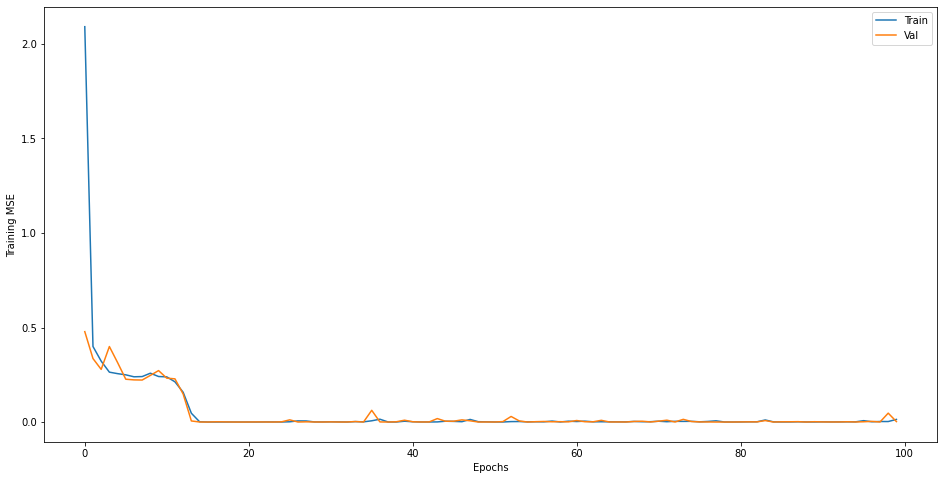

In [27]:
plt.figure(figsize=(16,8))
plt.plot(losses, label='Train')
plt.plot(val_losses, label='Val')
plt.xlabel("Epochs")
plt.ylabel("Training MSE")
plt.legend()
plt.show()

In [28]:
y_hats=net(torch.tensor(X_test.astype(float)).to(device).resize(len(X_test),1).float()).detach().cpu().numpy().reshape(1,-1).flatten()

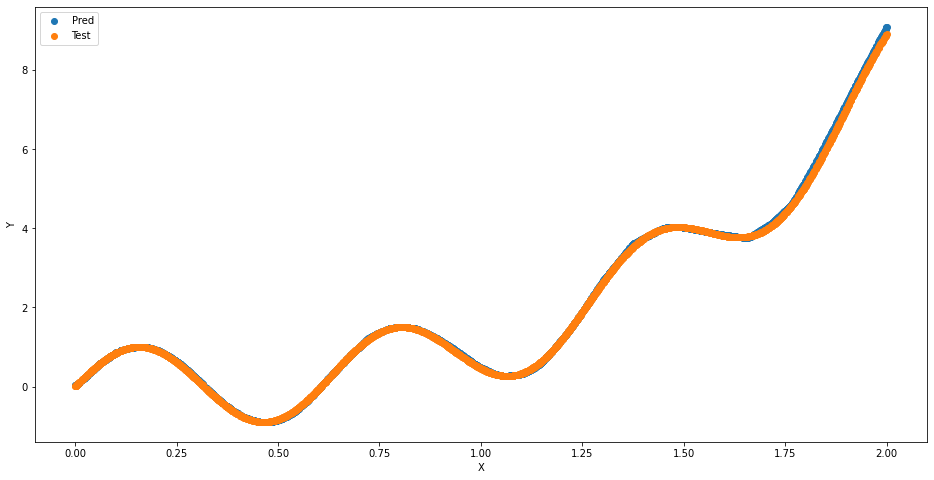

In [29]:
plt.figure(figsize=(16,8))
plt.scatter(X_test,y_hats, label='Pred')
plt.scatter(X_test,Y_test, label='Test')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [30]:
y_hats_train=net(torch.tensor(X_train.astype(float)).to(device).resize(len(X_train),1).float()).detach().cpu().numpy().reshape(1,-1).flatten()

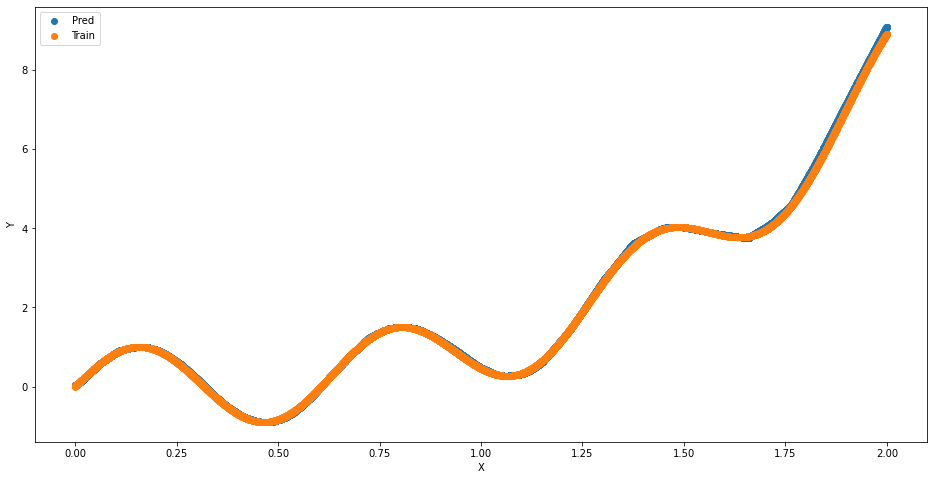

In [31]:
plt.figure(figsize=(16,8))
plt.scatter(X_train,y_hats_train, label='Pred')
plt.scatter(X_train,Y_train, label='Train')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

Podemos ver un overfitting claro, ya que la la prediccion del set de entrenamiento es casi exactamente igual a la funcion en si(siendo su mse infimo)

## Nnet con regularizacion

In [32]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.dropout = torch.nn.Dropout(0.4)
        self.fc1 = nn.Linear(1, 120)
        self.fc2 = nn.Linear(120, 250)
        self.fc3 = nn.Linear(250, 120)
        self.fc4 = nn.Linear(120, 120) 
        self.fc5 = nn.Linear(120, 84)
        self.fc6 = nn.Linear(84, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = self.dropout(x)
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return x





In [33]:
net = Net()
print(net)
optimizer=torch.optim.Adam(net.parameters(), lr=learning_rate,weight_decay=1e-5)
criterion=nn.MSELoss()


Net(
  (dropout): Dropout(p=0.4, inplace=False)
  (fc1): Linear(in_features=1, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=250, bias=True)
  (fc3): Linear(in_features=250, out_features=120, bias=True)
  (fc4): Linear(in_features=120, out_features=120, bias=True)
  (fc5): Linear(in_features=120, out_features=84, bias=True)
  (fc6): Linear(in_features=84, out_features=1, bias=True)
)


In [34]:
losses,val_losses=fit(net, dataloader,criterion,optimizer, epochs=150)

100%|██████████| 47/47 [00:00<00:00, 1020.13it/s]


Epoch 1/150 loss 2.35333 val_loss 0.80587


100%|██████████| 47/47 [00:00<00:00, 1022.00it/s]


Epoch 2/150 loss 1.04921 val_loss 0.82303


100%|██████████| 47/47 [00:00<00:00, 918.91it/s]


Epoch 3/150 loss 0.93366 val_loss 0.82105


100%|██████████| 47/47 [00:00<00:00, 972.96it/s]


Epoch 4/150 loss 0.82973 val_loss 0.83416


100%|██████████| 47/47 [00:00<00:00, 908.74it/s]


Epoch 5/150 loss 0.79551 val_loss 0.68753


100%|██████████| 47/47 [00:00<00:00, 1009.15it/s]


Epoch 6/150 loss 0.72957 val_loss 0.80508


100%|██████████| 47/47 [00:00<00:00, 1043.20it/s]


Epoch 7/150 loss 0.64172 val_loss 1.73200


100%|██████████| 47/47 [00:00<00:00, 1066.40it/s]


Epoch 8/150 loss 0.67062 val_loss 1.16839


100%|██████████| 47/47 [00:00<00:00, 1045.59it/s]


Epoch 9/150 loss 0.58885 val_loss 1.41824


100%|██████████| 47/47 [00:00<00:00, 1026.05it/s]


Epoch 10/150 loss 0.58991 val_loss 0.85038


100%|██████████| 47/47 [00:00<00:00, 983.27it/s]


Epoch 11/150 loss 0.54412 val_loss 0.84689


100%|██████████| 47/47 [00:00<00:00, 1048.45it/s]


Epoch 12/150 loss 0.55397 val_loss 1.22307


100%|██████████| 47/47 [00:00<00:00, 1078.56it/s]


Epoch 13/150 loss 0.49740 val_loss 1.13265


100%|██████████| 47/47 [00:00<00:00, 1055.57it/s]


Epoch 14/150 loss 0.49368 val_loss 1.17930


100%|██████████| 47/47 [00:00<00:00, 1084.35it/s]


Epoch 15/150 loss 0.49095 val_loss 0.90757


100%|██████████| 47/47 [00:00<00:00, 1021.96it/s]


Epoch 16/150 loss 0.48151 val_loss 1.18667


100%|██████████| 47/47 [00:00<00:00, 1036.69it/s]


Epoch 17/150 loss 0.41925 val_loss 1.09909


100%|██████████| 47/47 [00:00<00:00, 1025.45it/s]


Epoch 18/150 loss 0.42774 val_loss 1.04313


100%|██████████| 47/47 [00:00<00:00, 972.44it/s]


Epoch 19/150 loss 0.39082 val_loss 1.01502


100%|██████████| 47/47 [00:00<00:00, 1075.52it/s]


Epoch 20/150 loss 0.38475 val_loss 0.99470


100%|██████████| 47/47 [00:00<00:00, 1032.27it/s]


Epoch 21/150 loss 0.36354 val_loss 0.79131


100%|██████████| 47/47 [00:00<00:00, 1080.82it/s]


Epoch 22/150 loss 0.34111 val_loss 1.06757


100%|██████████| 47/47 [00:00<00:00, 1099.71it/s]


Epoch 23/150 loss 0.31761 val_loss 0.86348


100%|██████████| 47/47 [00:00<00:00, 1073.80it/s]


Epoch 24/150 loss 0.31540 val_loss 1.16484


100%|██████████| 47/47 [00:00<00:00, 998.05it/s]


Epoch 25/150 loss 0.28543 val_loss 0.72481


100%|██████████| 47/47 [00:00<00:00, 990.17it/s]


Epoch 26/150 loss 0.28613 val_loss 0.68581


100%|██████████| 47/47 [00:00<00:00, 1006.17it/s]


Epoch 27/150 loss 0.30095 val_loss 0.49176


100%|██████████| 47/47 [00:00<00:00, 1020.49it/s]


Epoch 28/150 loss 0.28016 val_loss 0.56377


100%|██████████| 47/47 [00:00<00:00, 965.71it/s]


Epoch 29/150 loss 0.25313 val_loss 0.50256


100%|██████████| 47/47 [00:00<00:00, 1058.39it/s]


Epoch 30/150 loss 0.22586 val_loss 0.76497


100%|██████████| 47/47 [00:00<00:00, 931.77it/s]


Epoch 31/150 loss 0.23270 val_loss 0.68783


100%|██████████| 47/47 [00:00<00:00, 967.13it/s]


Epoch 32/150 loss 0.22839 val_loss 0.41488


100%|██████████| 47/47 [00:00<00:00, 974.14it/s]


Epoch 33/150 loss 0.22621 val_loss 0.29206


100%|██████████| 47/47 [00:00<00:00, 1023.84it/s]


Epoch 34/150 loss 0.22638 val_loss 0.83632


100%|██████████| 47/47 [00:00<00:00, 787.75it/s]


Epoch 35/150 loss 0.21355 val_loss 0.40699


100%|██████████| 47/47 [00:00<00:00, 983.87it/s]


Epoch 36/150 loss 0.20185 val_loss 0.39003


100%|██████████| 47/47 [00:00<00:00, 982.69it/s]


Epoch 37/150 loss 0.19774 val_loss 0.49743


100%|██████████| 47/47 [00:00<00:00, 261.33it/s]


Epoch 38/150 loss 0.18535 val_loss 0.49633


100%|██████████| 47/47 [00:00<00:00, 950.21it/s]


Epoch 39/150 loss 0.18775 val_loss 0.24775


100%|██████████| 47/47 [00:00<00:00, 1037.12it/s]


Epoch 40/150 loss 0.19727 val_loss 0.30633


100%|██████████| 47/47 [00:00<00:00, 1035.52it/s]


Epoch 41/150 loss 0.18205 val_loss 0.22722


100%|██████████| 47/47 [00:00<00:00, 1010.93it/s]


Epoch 42/150 loss 0.18378 val_loss 0.32427


100%|██████████| 47/47 [00:00<00:00, 956.84it/s]


Epoch 43/150 loss 0.17532 val_loss 0.24390


100%|██████████| 47/47 [00:00<00:00, 983.31it/s]


Epoch 44/150 loss 0.15953 val_loss 0.24877


100%|██████████| 47/47 [00:00<00:00, 1113.15it/s]


Epoch 45/150 loss 0.17071 val_loss 0.15514


100%|██████████| 47/47 [00:00<00:00, 1013.24it/s]


Epoch 46/150 loss 0.15842 val_loss 0.22554


100%|██████████| 47/47 [00:00<00:00, 1041.40it/s]


Epoch 47/150 loss 0.15736 val_loss 0.36079


100%|██████████| 47/47 [00:00<00:00, 977.88it/s]


Epoch 48/150 loss 0.15266 val_loss 0.42399


100%|██████████| 47/47 [00:00<00:00, 1057.60it/s]


Epoch 49/150 loss 0.15861 val_loss 0.31483


100%|██████████| 47/47 [00:00<00:00, 993.10it/s]


Epoch 50/150 loss 0.15403 val_loss 0.21249


100%|██████████| 47/47 [00:00<00:00, 1089.91it/s]


Epoch 51/150 loss 0.14638 val_loss 0.38995


100%|██████████| 47/47 [00:00<00:00, 1052.00it/s]


Epoch 52/150 loss 0.13456 val_loss 0.23296


100%|██████████| 47/47 [00:00<00:00, 1038.82it/s]


Epoch 53/150 loss 0.14832 val_loss 0.24207


100%|██████████| 47/47 [00:00<00:00, 1042.55it/s]


Epoch 54/150 loss 0.14785 val_loss 0.26486


100%|██████████| 47/47 [00:00<00:00, 1059.13it/s]


Epoch 55/150 loss 0.14542 val_loss 0.19430


100%|██████████| 47/47 [00:00<00:00, 940.06it/s]


Epoch 56/150 loss 0.14240 val_loss 0.23160


100%|██████████| 47/47 [00:00<00:00, 533.35it/s]


Epoch 57/150 loss 0.15213 val_loss 0.21590


100%|██████████| 47/47 [00:00<00:00, 548.44it/s]


Epoch 58/150 loss 0.14381 val_loss 0.20388


100%|██████████| 47/47 [00:00<00:00, 583.30it/s]


Epoch 59/150 loss 0.13614 val_loss 0.25313


100%|██████████| 47/47 [00:00<00:00, 990.86it/s]


Epoch 60/150 loss 0.14204 val_loss 0.26925


100%|██████████| 47/47 [00:00<00:00, 1106.11it/s]


Epoch 61/150 loss 0.13786 val_loss 0.25016


100%|██████████| 47/47 [00:00<00:00, 1024.45it/s]


Epoch 62/150 loss 0.13152 val_loss 0.23114


100%|██████████| 47/47 [00:00<00:00, 1031.80it/s]


Epoch 63/150 loss 0.12591 val_loss 0.21270


100%|██████████| 47/47 [00:00<00:00, 1008.73it/s]


Epoch 64/150 loss 0.13549 val_loss 0.19179


100%|██████████| 47/47 [00:00<00:00, 1000.72it/s]


Epoch 65/150 loss 0.13212 val_loss 0.20132


100%|██████████| 47/47 [00:00<00:00, 1032.27it/s]


Epoch 66/150 loss 0.12723 val_loss 0.32622


100%|██████████| 47/47 [00:00<00:00, 995.19it/s]


Epoch 67/150 loss 0.12210 val_loss 0.15322


100%|██████████| 47/47 [00:00<00:00, 1008.20it/s]


Epoch 68/150 loss 0.12233 val_loss 0.20826


100%|██████████| 47/47 [00:00<00:00, 968.28it/s]


Epoch 69/150 loss 0.13195 val_loss 0.21593


100%|██████████| 47/47 [00:00<00:00, 1015.79it/s]


Epoch 70/150 loss 0.12530 val_loss 0.32453


100%|██████████| 47/47 [00:00<00:00, 1067.56it/s]


Epoch 71/150 loss 0.12713 val_loss 0.32924


100%|██████████| 47/47 [00:00<00:00, 967.76it/s]


Epoch 72/150 loss 0.13263 val_loss 0.16758


100%|██████████| 47/47 [00:00<00:00, 990.45it/s]


Epoch 73/150 loss 0.11877 val_loss 0.22529


100%|██████████| 47/47 [00:00<00:00, 945.32it/s]


Epoch 74/150 loss 0.12921 val_loss 0.27227


100%|██████████| 47/47 [00:00<00:00, 1022.98it/s]


Epoch 75/150 loss 0.12369 val_loss 0.09628


100%|██████████| 47/47 [00:00<00:00, 1060.54it/s]


Epoch 76/150 loss 0.12605 val_loss 0.20902


100%|██████████| 47/47 [00:00<00:00, 985.29it/s]


Epoch 77/150 loss 0.12368 val_loss 0.12145


100%|██████████| 47/47 [00:00<00:00, 1025.97it/s]


Epoch 78/150 loss 0.12189 val_loss 0.16042


100%|██████████| 47/47 [00:00<00:00, 1038.06it/s]


Epoch 79/150 loss 0.12141 val_loss 0.16586


100%|██████████| 47/47 [00:00<00:00, 1028.33it/s]


Epoch 80/150 loss 0.11688 val_loss 0.22158


100%|██████████| 47/47 [00:00<00:00, 1048.80it/s]


Epoch 81/150 loss 0.11785 val_loss 0.18874


100%|██████████| 47/47 [00:00<00:00, 923.49it/s]


Epoch 82/150 loss 0.10786 val_loss 0.36807


100%|██████████| 47/47 [00:00<00:00, 987.34it/s]


Epoch 83/150 loss 0.11859 val_loss 0.16685


100%|██████████| 47/47 [00:00<00:00, 1004.13it/s]


Epoch 84/150 loss 0.10556 val_loss 0.20621


100%|██████████| 47/47 [00:00<00:00, 447.63it/s]


Epoch 85/150 loss 0.10852 val_loss 0.23379


100%|██████████| 47/47 [00:00<00:00, 978.44it/s]


Epoch 86/150 loss 0.11160 val_loss 0.26082


100%|██████████| 47/47 [00:00<00:00, 1025.36it/s]


Epoch 87/150 loss 0.11856 val_loss 0.16918


100%|██████████| 47/47 [00:00<00:00, 382.82it/s]


Epoch 88/150 loss 0.10652 val_loss 0.28311


100%|██████████| 47/47 [00:00<00:00, 566.64it/s]


Epoch 89/150 loss 0.12295 val_loss 0.15298


100%|██████████| 47/47 [00:00<00:00, 224.99it/s]


Epoch 90/150 loss 0.10973 val_loss 0.18880


100%|██████████| 47/47 [00:00<00:00, 813.07it/s]


Epoch 91/150 loss 0.10375 val_loss 0.10084


100%|██████████| 47/47 [00:00<00:00, 470.71it/s]


Epoch 92/150 loss 0.10493 val_loss 0.15171


100%|██████████| 47/47 [00:00<00:00, 1007.52it/s]


Epoch 93/150 loss 0.10402 val_loss 0.14186


100%|██████████| 47/47 [00:00<00:00, 421.55it/s]


Epoch 94/150 loss 0.10307 val_loss 0.17986


100%|██████████| 47/47 [00:00<00:00, 953.89it/s]


Epoch 95/150 loss 0.10620 val_loss 0.21232


100%|██████████| 47/47 [00:00<00:00, 549.52it/s]


Epoch 96/150 loss 0.10725 val_loss 0.17501


100%|██████████| 47/47 [00:00<00:00, 607.22it/s]


Epoch 97/150 loss 0.10519 val_loss 0.15925


100%|██████████| 47/47 [00:00<00:00, 471.66it/s]


Epoch 98/150 loss 0.09931 val_loss 0.29184


100%|██████████| 47/47 [00:00<00:00, 443.05it/s]


Epoch 99/150 loss 0.10911 val_loss 0.15832


100%|██████████| 47/47 [00:00<00:00, 973.26it/s]


Epoch 100/150 loss 0.10158 val_loss 0.19149


100%|██████████| 47/47 [00:00<00:00, 1014.63it/s]


Epoch 101/150 loss 0.09971 val_loss 0.26895


100%|██████████| 47/47 [00:00<00:00, 1020.95it/s]


Epoch 102/150 loss 0.09773 val_loss 0.11824


100%|██████████| 47/47 [00:00<00:00, 1028.03it/s]


Epoch 103/150 loss 0.10305 val_loss 0.13951


100%|██████████| 47/47 [00:00<00:00, 1038.10it/s]


Epoch 104/150 loss 0.10225 val_loss 0.22746


100%|██████████| 47/47 [00:00<00:00, 945.06it/s]


Epoch 105/150 loss 0.10292 val_loss 0.26698


100%|██████████| 47/47 [00:00<00:00, 996.68it/s]


Epoch 106/150 loss 0.09314 val_loss 0.13934


100%|██████████| 47/47 [00:00<00:00, 886.12it/s]


Epoch 107/150 loss 0.09845 val_loss 0.31409


100%|██████████| 47/47 [00:00<00:00, 1065.57it/s]


Epoch 108/150 loss 0.09709 val_loss 0.13939


100%|██████████| 47/47 [00:00<00:00, 855.68it/s]


Epoch 109/150 loss 0.09380 val_loss 0.19624


100%|██████████| 47/47 [00:00<00:00, 982.90it/s]


Epoch 110/150 loss 0.09821 val_loss 0.19320


100%|██████████| 47/47 [00:00<00:00, 541.34it/s]


Epoch 111/150 loss 0.09170 val_loss 0.16773


100%|██████████| 47/47 [00:00<00:00, 860.41it/s]


Epoch 112/150 loss 0.10173 val_loss 0.17966


100%|██████████| 47/47 [00:00<00:00, 552.31it/s]


Epoch 113/150 loss 0.09407 val_loss 0.28093


100%|██████████| 47/47 [00:00<00:00, 627.09it/s]


Epoch 114/150 loss 0.09196 val_loss 0.24062


100%|██████████| 47/47 [00:00<00:00, 630.22it/s]


Epoch 115/150 loss 0.08863 val_loss 0.23679


100%|██████████| 47/47 [00:00<00:00, 514.00it/s]


Epoch 116/150 loss 0.09942 val_loss 0.15871


100%|██████████| 47/47 [00:00<00:00, 748.24it/s]


Epoch 117/150 loss 0.09095 val_loss 0.28421


100%|██████████| 47/47 [00:00<00:00, 1041.79it/s]


Epoch 118/150 loss 0.09019 val_loss 0.24820


100%|██████████| 47/47 [00:00<00:00, 477.09it/s]


Epoch 119/150 loss 0.09346 val_loss 0.27857


100%|██████████| 47/47 [00:00<00:00, 907.42it/s]


Epoch 120/150 loss 0.09119 val_loss 0.23630


100%|██████████| 47/47 [00:00<00:00, 990.28it/s]


Epoch 121/150 loss 0.09838 val_loss 0.22903


100%|██████████| 47/47 [00:00<00:00, 1008.14it/s]


Epoch 122/150 loss 0.09152 val_loss 0.22461


100%|██████████| 47/47 [00:00<00:00, 437.76it/s]


Epoch 123/150 loss 0.09013 val_loss 0.13969


100%|██████████| 47/47 [00:00<00:00, 369.18it/s]


Epoch 124/150 loss 0.08917 val_loss 0.14430


100%|██████████| 47/47 [00:00<00:00, 980.52it/s]


Epoch 125/150 loss 0.09687 val_loss 0.18236


100%|██████████| 47/47 [00:00<00:00, 1025.56it/s]


Epoch 126/150 loss 0.09206 val_loss 0.21528


100%|██████████| 47/47 [00:00<00:00, 1017.50it/s]


Epoch 127/150 loss 0.09525 val_loss 0.16512


100%|██████████| 47/47 [00:00<00:00, 581.47it/s]


Epoch 128/150 loss 0.09475 val_loss 0.14434


100%|██████████| 47/47 [00:00<00:00, 532.20it/s]


Epoch 129/150 loss 0.08610 val_loss 0.21206


100%|██████████| 47/47 [00:00<00:00, 430.74it/s]


Epoch 130/150 loss 0.08514 val_loss 0.23049


100%|██████████| 47/47 [00:00<00:00, 541.97it/s]


Epoch 131/150 loss 0.08383 val_loss 0.16853


100%|██████████| 47/47 [00:00<00:00, 1049.22it/s]


Epoch 132/150 loss 0.08910 val_loss 0.16675


100%|██████████| 47/47 [00:00<00:00, 814.81it/s]


Epoch 133/150 loss 0.08905 val_loss 0.11942


100%|██████████| 47/47 [00:00<00:00, 569.53it/s]


Epoch 134/150 loss 0.09246 val_loss 0.19520


100%|██████████| 47/47 [00:00<00:00, 563.94it/s]


Epoch 135/150 loss 0.09145 val_loss 0.21008


100%|██████████| 47/47 [00:00<00:00, 541.93it/s]


Epoch 136/150 loss 0.08182 val_loss 0.29446


100%|██████████| 47/47 [00:00<00:00, 959.83it/s]


Epoch 137/150 loss 0.08428 val_loss 0.18074


100%|██████████| 47/47 [00:00<00:00, 930.44it/s]


Epoch 138/150 loss 0.09231 val_loss 0.18166


100%|██████████| 47/47 [00:00<00:00, 1007.04it/s]


Epoch 139/150 loss 0.09239 val_loss 0.19584


100%|██████████| 47/47 [00:00<00:00, 944.65it/s]


Epoch 140/150 loss 0.08604 val_loss 0.14069


100%|██████████| 47/47 [00:00<00:00, 1051.71it/s]


Epoch 141/150 loss 0.08590 val_loss 0.22890


100%|██████████| 47/47 [00:00<00:00, 1034.90it/s]


Epoch 142/150 loss 0.08141 val_loss 0.18224


100%|██████████| 47/47 [00:00<00:00, 1025.05it/s]


Epoch 143/150 loss 0.08589 val_loss 0.24774


100%|██████████| 47/47 [00:00<00:00, 201.09it/s]


Epoch 144/150 loss 0.08327 val_loss 0.18961


100%|██████████| 47/47 [00:00<00:00, 972.37it/s]


Epoch 145/150 loss 0.08432 val_loss 0.18624


100%|██████████| 47/47 [00:00<00:00, 513.24it/s]


Epoch 146/150 loss 0.08423 val_loss 0.26212


100%|██████████| 47/47 [00:00<00:00, 612.66it/s]


Epoch 147/150 loss 0.08397 val_loss 0.17941


100%|██████████| 47/47 [00:00<00:00, 896.60it/s]


Epoch 148/150 loss 0.08397 val_loss 0.10598


100%|██████████| 47/47 [00:00<00:00, 983.91it/s]


Epoch 149/150 loss 0.09537 val_loss 0.35364


100%|██████████| 47/47 [00:00<00:00, 997.01it/s]

Epoch 150/150 loss 0.08782 val_loss 0.23947


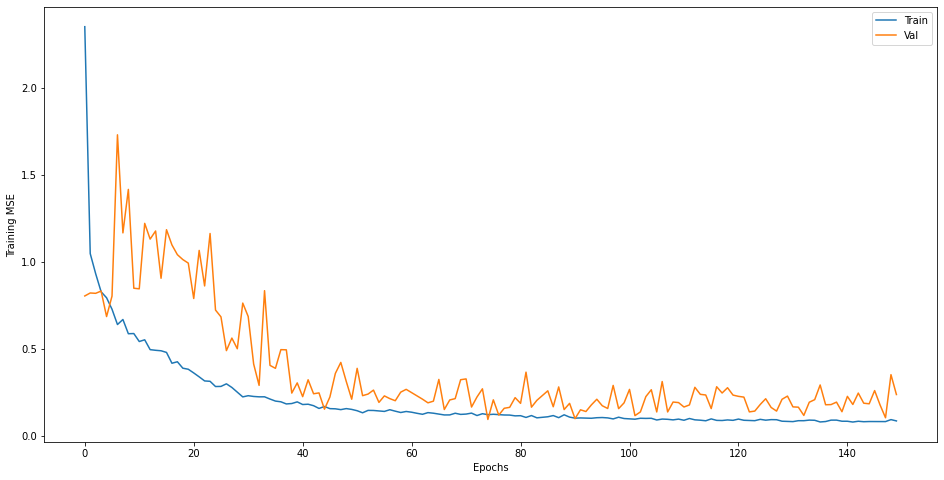

In [35]:
plt.figure(figsize=(16,8))
plt.plot(losses, label='Train')
plt.plot(val_losses, label='Val')
plt.xlabel("Epochs")
plt.ylabel("Training MSE")
plt.legend()
plt.show()

In [36]:
y_hats_train=net(torch.tensor(X_train.astype(float)).to(device).resize(len(X_train),1).float()).detach().cpu().numpy().reshape(1,-1).flatten()

In [37]:
y_hats_test=net(torch.tensor(X_test.astype(float)).to(device).resize(len(X_test),1).float()).detach().cpu().numpy().reshape(1,-1).flatten()

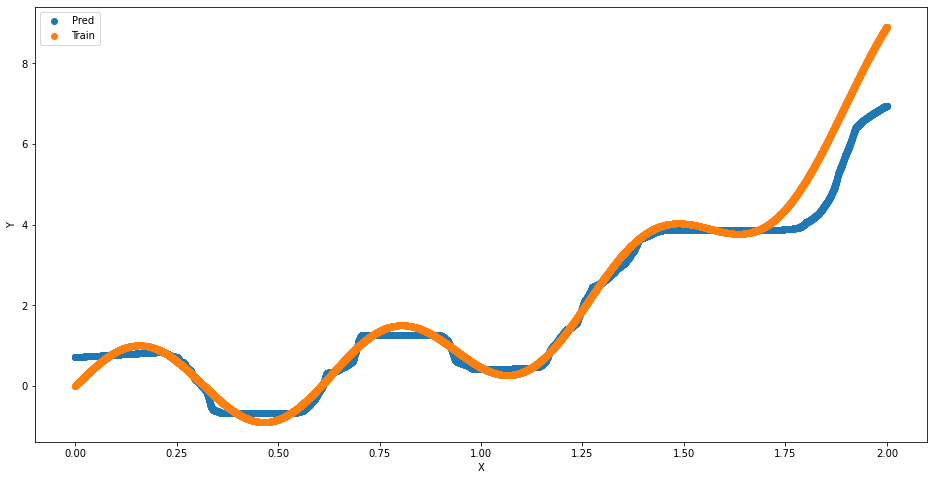

In [38]:
plt.figure(figsize=(16,8))
plt.scatter(X_train,y_hats_train, label='Pred')
plt.scatter(X_train,Y_train, label='Train')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

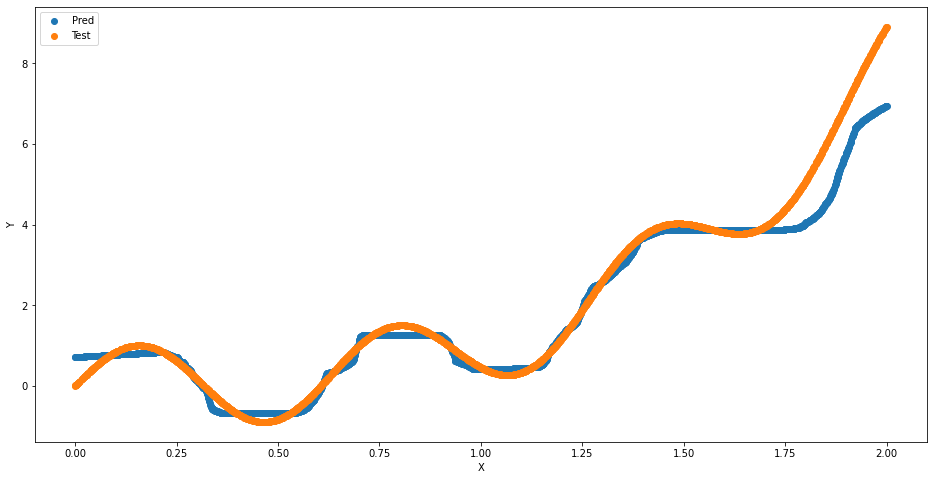

In [39]:
plt.figure(figsize=(16,8))
plt.scatter(X_test,y_hats_test, label='Pred')
plt.scatter(X_test,Y_test, label='Test')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

## Ahora si podemos ver que agregando regularizacion y dropout el fit es mas correcto que antes, el mse esta mas contenido y no esta tan cerca del 0, como en la version sin regularizacion

# Punto 3 
Descargar el dataset desde el siguiente link. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación binaria donde queremos averiguar si el cliente va a gastar mucha plata (más de 9000) o poca plata (menos de 9000).


## Preprocesamiento

In [41]:
ds2=pd.read_csv("drive/MyDrive/dataset_2.csv")
ds2.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [42]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [43]:
ds2=ds2.drop(columns=["Product_Category_3"])

In [44]:
linearR = LinearRegression()
logisticR = LogisticRegression()
columns=["User_ID","Occupation","Marital_Status","Product_Category_1","Product_Category_2"]

imp = IterativeImputer(n_nearest_features=4,estimator=linearR,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
ds2[columns]=imp.fit_transform(ds2[columns])

[IterativeImputer] Completing matrix with shape (550068, 5)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.41
[IterativeImputer] Change: 13.265779264699173, scaled tolerance: 1006.0400000000001 
[IterativeImputer] Early stopping criterion reached.


In [45]:
for i in columns:
  ds2 = ds2.astype({i: int})
ds2 = ds2.astype({"Occupation": int})

In [46]:
ds2

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,16,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,13,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,23,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,22,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,23,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,22,365


In [47]:
ds2['Big_Purchase'] = ds2.Purchase>9000
ds2 = ds2.astype({"Big_Purchase": int})

In [48]:
stringColumns=["Gender","Age","City_Category","Stay_In_Current_City_Years"]
for column in stringColumns:
  one_hot = pd.get_dummies(ds2[column],prefix=column)
  # Drop column B as it is now encoded
  ds2 = ds2.drop(column,axis = 1)
  # Join the encoded df
  ds2 = ds2.join(one_hot)
ds2  

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Big_Purchase,Gender_F,Gender_M,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,10,0,3,8,8370,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,1000001,P00248942,10,0,1,6,15200,1,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1000001,P00087842,10,0,12,16,1422,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,1000001,P00085442,10,0,12,14,1057,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,1000002,P00285442,16,0,8,13,7969,0,0,1,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,13,1,20,23,368,0,0,1,...,1,0,0,1,0,0,1,0,0,0
550064,1006035,P00375436,1,0,20,22,371,0,1,0,...,0,0,0,0,1,0,0,0,1,0
550065,1006036,P00375436,15,1,20,23,137,0,1,0,...,0,0,0,1,0,0,0,0,0,1
550066,1006038,P00375436,1,0,20,22,365,0,1,0,...,0,1,0,0,1,0,0,1,0,0


## A
Entrenar un modelo de deep learning que no utilice embeddings

In [49]:
ds2=ds2.drop(columns=["Purchase"])
ds3=ds2.copy()
ds3=ds3.drop(columns=["User_ID","Product_ID"])

In [50]:
random_state=25

In [51]:
X=ds3.drop(columns=["Big_Purchase"])
Y=ds3[["Big_Purchase"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70, random_state=random_state)
X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

In [52]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [53]:
X_test=scaler.transform(X_test)

In [54]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(385047, 21)
(385047, 1)
(165021, 21)
(165021, 1)


In [55]:
train_dataset_fulll = TensorDataset( Tensor(X_train), Tensor(Y_train) )
test_dataset_fulll = TensorDataset( Tensor(X_test), Tensor(Y_test) )
dataloader = {
    'train': torch.utils.data.DataLoader(train_dataset_fulll, batch_size=64, shuffle=True, pin_memory=True),
    'test': torch.utils.data.DataLoader(test_dataset_fulll, batch_size=64, shuffle=False, pin_memory=True)
}

In [56]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(21, 15) 
        self.fc2 = nn.Linear(15, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x





In [57]:
def fit(model, dataloader,criterion,optimizer, epochs=5):
    model.to(device)
    losses = []
    val_losses = []
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            #X = X.float()
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            ####
            #acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            acc = (len(y) - (y - y_hat.abs()).abs().sum().item()) / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                #X = X.float()
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (len(y) - (y - y_hat.abs()).abs().sum().item()) / len(y)
                #acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
         # early stopping
        #if early_stopping(train_loss[-1], val_loss[-1], min_delta=10, tolerance = 20):
        #  print("We are at epoch:", epoch)
        #  break
        losses.append(np.mean(train_loss))
        val_losses.append(np.mean(val_loss))
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc)}:.5f")
    return losses,val_losses

In [58]:
net=Net()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
criterion = torch.nn.BCELoss()

In [59]:
losses,val_losses=fit(net, dataloader,criterion,optimizer, epochs=20)

  0%|          | 0/6017 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
val_loss 0.40981 val_acc 0.73145: 100%|██████████| 2579/2579 [00:12<00:00, 203.99it/s]


Epoch 1/20 loss 0.46189 val_loss 0.40981 acc 0.69099 val_acc 0.731446307593173:.5f


val_loss 0.37920 val_acc 0.74926: 100%|██████████| 2579/2579 [00:11<00:00, 221.23it/s]


Epoch 2/20 loss 0.39097 val_loss 0.37920 acc 0.73770 val_acc 0.7492554813551304:.5f


val_loss 0.37061 val_acc 0.75712: 100%|██████████| 2579/2579 [00:11<00:00, 218.88it/s]


Epoch 3/20 loss 0.37456 val_loss 0.37061 acc 0.75127 val_acc 0.7571213671494804:.5f


val_loss 0.36958 val_acc 0.76390: 100%|██████████| 2579/2579 [00:11<00:00, 217.15it/s]


Epoch 4/20 loss 0.36979 val_loss 0.36958 acc 0.75596 val_acc 0.7639019432751741:.5f


val_loss 0.35679 val_acc 0.76291: 100%|██████████| 2579/2579 [00:11<00:00, 216.40it/s]


Epoch 5/20 loss 0.36452 val_loss 0.35679 acc 0.76003 val_acc 0.7629128428603235:.5f


val_loss 0.35477 val_acc 0.77525: 100%|██████████| 2579/2579 [00:11<00:00, 219.00it/s]


Epoch 6/20 loss 0.35489 val_loss 0.35477 acc 0.76810 val_acc 0.7752505396660699:.5f


val_loss 0.35568 val_acc 0.76014: 100%|██████████| 2579/2579 [00:11<00:00, 216.98it/s]


Epoch 7/20 loss 0.35248 val_loss 0.35568 acc 0.77107 val_acc 0.7601401404356631:.5f


val_loss 0.35112 val_acc 0.77874: 100%|██████████| 2579/2579 [00:11<00:00, 217.44it/s]


Epoch 8/20 loss 0.35129 val_loss 0.35112 acc 0.77221 val_acc 0.7787364081367749:.5f


val_loss 0.35058 val_acc 0.78144: 100%|██████████| 2579/2579 [00:11<00:00, 217.50it/s]


Epoch 9/20 loss 0.34893 val_loss 0.35058 acc 0.77367 val_acc 0.7814392794666623:.5f


val_loss 0.34937 val_acc 0.76290: 100%|██████████| 2579/2579 [00:11<00:00, 228.80it/s]


Epoch 10/20 loss 0.34764 val_loss 0.34937 acc 0.77484 val_acc 0.7629011807423892:.5f


val_loss 0.34648 val_acc 0.78448: 100%|██████████| 2579/2579 [00:11<00:00, 219.93it/s]


Epoch 11/20 loss 0.34627 val_loss 0.34648 acc 0.77545 val_acc 0.7844750924372792:.5f


val_loss 0.34337 val_acc 0.77256: 100%|██████████| 2579/2579 [00:11<00:00, 220.19it/s]


Epoch 12/20 loss 0.34377 val_loss 0.34337 acc 0.77652 val_acc 0.772556135043241:.5f


val_loss 0.33642 val_acc 0.77832: 100%|██████████| 2579/2579 [00:11<00:00, 219.06it/s]


Epoch 13/20 loss 0.33969 val_loss 0.33642 acc 0.77836 val_acc 0.7783212588045265:.5f


val_loss 0.33146 val_acc 0.78534: 100%|██████████| 2579/2579 [00:11<00:00, 221.56it/s]


Epoch 14/20 loss 0.33402 val_loss 0.33146 acc 0.78131 val_acc 0.7853373687916714:.5f


val_loss 0.32894 val_acc 0.78748: 100%|██████████| 2579/2579 [00:11<00:00, 215.66it/s]


Epoch 15/20 loss 0.33021 val_loss 0.32894 acc 0.78384 val_acc 0.7874813100940194:.5f


val_loss 0.32950 val_acc 0.78944: 100%|██████████| 2579/2579 [00:11<00:00, 215.44it/s]


Epoch 16/20 loss 0.32843 val_loss 0.32950 acc 0.78534 val_acc 0.7894387114170694:.5f


val_loss 0.32806 val_acc 0.78954: 100%|██████████| 2579/2579 [00:11<00:00, 215.04it/s]


Epoch 17/20 loss 0.32716 val_loss 0.32806 acc 0.78647 val_acc 0.7895427786796149:.5f


val_loss 0.32776 val_acc 0.78511: 100%|██████████| 2579/2579 [00:11<00:00, 216.87it/s]


Epoch 18/20 loss 0.32671 val_loss 0.32776 acc 0.78717 val_acc 0.7851104796590452:.5f


val_loss 0.32665 val_acc 0.78707: 100%|██████████| 2579/2579 [00:11<00:00, 220.10it/s]


Epoch 19/20 loss 0.32609 val_loss 0.32665 acc 0.78773 val_acc 0.7870709092541468:.5f


val_loss 0.32700 val_acc 0.78869: 100%|██████████| 2579/2579 [00:11<00:00, 218.53it/s]

Epoch 20/20 loss 0.32549 val_loss 0.32700 acc 0.78829 val_acc 0.7886935454049981:.5f


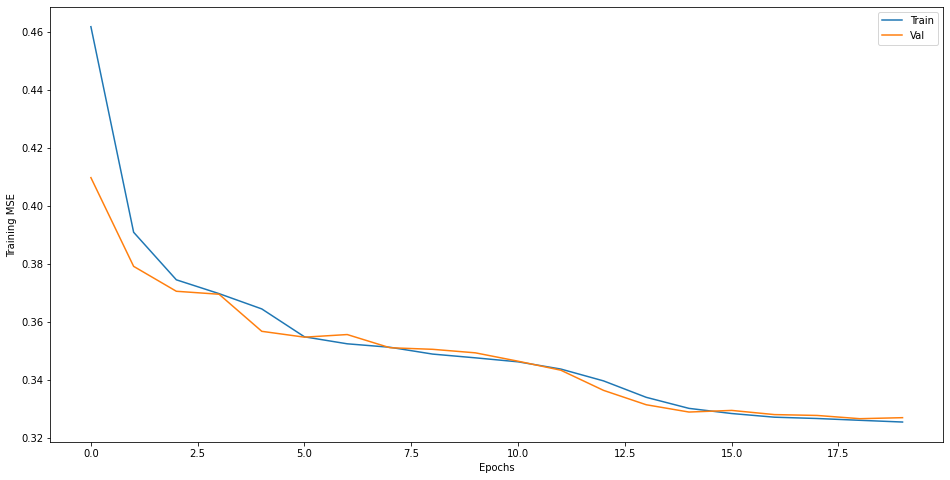

In [60]:
plt.figure(figsize=(16,8))
plt.plot(losses, label='Train')
plt.plot(val_losses, label='Val')
plt.xlabel("Epochs")
plt.ylabel("Training MSE")
plt.legend()
plt.show()

In [61]:
losses_noEMB=np.copy(losses)


val_losses_noEMB=np.copy(val_losses)

net_noEMB=net

## B
Entrenar un modelo de deep learning que utilice embeddings tanto para los productos como los usuarios. Realizar el mapeo de identificador de producto y usuarios a indices antes de separar el dataset en training, validation y testing

In [62]:
ds2

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Big_Purchase,Gender_F,Gender_M,Age_0-17,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,10,0,3,8,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
1,1000001,P00248942,10,0,1,6,1,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,1000001,P00087842,10,0,12,16,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
3,1000001,P00085442,10,0,12,14,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
4,1000002,P00285442,16,0,8,13,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,13,1,20,23,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
550064,1006035,P00375436,1,0,20,22,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
550065,1006036,P00375436,15,1,20,23,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
550066,1006038,P00375436,1,0,20,22,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [63]:
user_id = ds2["User_ID"]
unique=np.unique(user_id)
# map user id a user index 
index = np.arange(0, len(unique)) # [0,1,...,499]
user_id_to_index = {key:value for key, value in zip(unique, index)}

user_idx = np.array([user_id_to_index[v] for v in user_id])

In [64]:
user_id = ds2["Product_ID"]
unique=np.unique(user_id)
# map user id a user index 
index = np.arange(0, len(unique)) # [0,1,...,499]
user_id_to_index = {key:value for key, value in zip(unique, index)}

product_idx = np.array([user_id_to_index[v] for v in user_id])

In [65]:
user_idx,product_idx

(array([   0,    0,    0, ..., 5886, 5888, 5889]),
 array([ 672, 2376,  852, ..., 3568, 3568, 3566]))

In [66]:
random_state=25

In [67]:
X=ds2.drop(columns=["Big_Purchase","User_ID","Product_ID"])
Y=ds2[["Big_Purchase"]]


In [68]:
user_idx_train, user_idx_test, Y_train, Y_test = train_test_split(user_idx, Y, train_size=0.70, random_state=random_state)
product_idx_train, product_idx_test, Y_train, Y_test = train_test_split(product_idx, Y, train_size=0.70, random_state=random_state)

In [69]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70, random_state=random_state)
#X_train=np.array(X_train)
#X_test=np.array(X_test)
#Y_train=np.array(Y_train)
#Y_test=np.array(Y_test)

In [70]:
#scaler = StandardScaler()
#X_train=scaler.fit_transform(X_train)

In [71]:

#X_test=scaler.transform(X_test)

In [72]:
#train_dataset_fulll = TensorDataset( Tensor(X_train.astype(int)), Tensor(Y_train) )
#test_dataset_fulll = TensorDataset( Tensor(X_test.astype(int)), Tensor(Y_test) )
#dataloader = {
#    'train': torch.utils.data.DataLoader(train_dataset_fulll, batch_size=64, shuffle=True, pin_memory=True),
#    'test': torch.utils.data.DataLoader(test_dataset_fulll, batch_size=64, shuffle=False, pin_memory=True)
#}

In [73]:
class Net_Embeddings(nn.Module):

    def __init__(self,num_users,num_prods,d_users,d_prods):
        super(Net_Embeddings, self).__init__()
        self.embedding_user = torch.nn.Embedding(num_embeddings=num_users, embedding_dim=d_users)
        self.embedding_prod = torch.nn.Embedding(num_embeddings=num_prods, embedding_dim=d_prods)
        self.fc1 = nn.Linear(21+d_prods+d_users, 15)
        self.drop1 = nn.Dropout(p=0.4) 
        self.fc2 = nn.Linear(15, 10)
        self.drop2 = nn.Dropout(p=0.4)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x, user_idx,prods_idx):
        user_emb = self.embedding_user(user_idx)
        prods_emb = self.embedding_user(prods_idx)
        final_input = torch.cat([x, user_emb,prods_emb], dim=1)       
        x = F.relu(self.fc1(final_input))
        #x = self.drop1(x)
        x = F.relu(self.fc2(x))
        #x = self.drop2(x)
        x = F.sigmoid(self.fc3(x))
        return x


In [74]:
net=Net_Embeddings(len(user_idx_train),len(product_idx_train),16,16)
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3,weight_decay=1e-5)
criterion = torch.nn.BCELoss()
user_idx = np.array([user_id_to_index[v] for v in user_id])

In [75]:
def fit_emb(model, dataloader,criterion,optimizer,user_idx_train,product_idx_train,user_idx_test,product_idx_test, epochs=5):
    model.to(device)
    losses = []
    val_losses = []
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        batchCounter=0
        for batch in bar:
            X, y = batch
            user_ids=user_idx_train[batchCounter*64:(batchCounter+1)*64]
            prduct_ids=product_idx_train[batchCounter*64:(batchCounter+1)*64]  
            batchCounter+=1         
            user_ids=user_ids.to(device)
            prduct_ids=prduct_ids.to(device)
            #X = X.float()
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X,user_ids,prduct_ids)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            ####
            #acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            acc = (len(y) - (y - y_hat.abs()).abs().sum().item()) / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        batchCounterVar=0
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                #X = X.float()
                user_ids=user_idx_test[batchCounterVar*64:(batchCounterVar+1)*64]
                user_ids=user_ids.to(device)
                prduct_ids=product_idx_test[batchCounterVar*64:(batchCounterVar+1)*64]
                prduct_ids=prduct_ids.to(device)
                X, y = X.to(device), y.to(device)
                y_hat = model(X,user_ids,prduct_ids)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (len(y) - (y - y_hat.abs()).abs().sum().item()) / len(y)
                #acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                batchCounterVar+=1
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
         # early stopping
        #if early_stopping(train_loss[-1], val_loss[-1], min_delta=10, tolerance = 20):
        #  print("We are at epoch:", epoch)
        #  break
        
        losses.append(np.mean(train_loss))
        val_losses.append(np.mean(val_loss))
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")
    return losses,val_losses

In [76]:
user_idx_train=torch.Tensor(user_idx_train).long()
user_idx_test=torch.Tensor(user_idx_test).long()
product_idx_train=torch.Tensor(product_idx_train).long()
product_idx_test=torch.Tensor(product_idx_test).long()


In [77]:
#np.bincount(Y_train.reshape(-1))

In [78]:
#np.bincount(Y_test.reshape(-1))

In [79]:
losses,val_losses=fit_emb(net, dataloader,criterion,optimizer,user_idx_train,product_idx_train,user_idx_test,product_idx_test, epochs=20)

  0%|          | 0/6017 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
val_loss 0.39707 val_acc 0.73253: 100%|██████████| 2579/2579 [00:12<00:00, 212.55it/s]


Epoch 1/20 loss 0.45285 val_loss 0.39707 acc 0.69589 val_acc 0.73253


val_loss 0.37616 val_acc 0.75201: 100%|██████████| 2579/2579 [00:12<00:00, 212.11it/s]


Epoch 2/20 loss 0.38357 val_loss 0.37616 acc 0.74308 val_acc 0.75201


val_loss 0.37092 val_acc 0.75603: 100%|██████████| 2579/2579 [00:12<00:00, 212.10it/s]


Epoch 3/20 loss 0.37291 val_loss 0.37092 acc 0.75250 val_acc 0.75603


val_loss 0.36717 val_acc 0.75794: 100%|██████████| 2579/2579 [00:12<00:00, 211.49it/s]


Epoch 4/20 loss 0.36907 val_loss 0.36717 acc 0.75646 val_acc 0.75794


val_loss 0.36727 val_acc 0.75825: 100%|██████████| 2579/2579 [00:12<00:00, 209.52it/s]


Epoch 5/20 loss 0.36724 val_loss 0.36727 acc 0.75846 val_acc 0.75825


val_loss 0.36367 val_acc 0.76484: 100%|██████████| 2579/2579 [00:12<00:00, 212.02it/s]


Epoch 6/20 loss 0.36588 val_loss 0.36367 acc 0.76000 val_acc 0.76484


val_loss 0.36054 val_acc 0.76214: 100%|██████████| 2579/2579 [00:12<00:00, 211.57it/s]


Epoch 7/20 loss 0.36251 val_loss 0.36054 acc 0.76225 val_acc 0.76214


val_loss 0.35777 val_acc 0.76737: 100%|██████████| 2579/2579 [00:12<00:00, 210.14it/s]


Epoch 8/20 loss 0.35997 val_loss 0.35777 acc 0.76366 val_acc 0.76737


val_loss 0.35587 val_acc 0.77252: 100%|██████████| 2579/2579 [00:12<00:00, 205.40it/s]


Epoch 9/20 loss 0.35709 val_loss 0.35587 acc 0.76529 val_acc 0.77252


val_loss 0.35185 val_acc 0.77408: 100%|██████████| 2579/2579 [00:12<00:00, 213.65it/s]


Epoch 10/20 loss 0.35298 val_loss 0.35185 acc 0.76782 val_acc 0.77408


val_loss 0.34524 val_acc 0.77515: 100%|██████████| 2579/2579 [00:11<00:00, 221.43it/s]


Epoch 11/20 loss 0.34804 val_loss 0.34524 acc 0.77138 val_acc 0.77515


val_loss 0.34418 val_acc 0.77185: 100%|██████████| 2579/2579 [00:11<00:00, 220.76it/s]


Epoch 12/20 loss 0.34448 val_loss 0.34418 acc 0.77469 val_acc 0.77185


val_loss 0.33909 val_acc 0.77562: 100%|██████████| 2579/2579 [00:11<00:00, 224.10it/s]


Epoch 13/20 loss 0.34180 val_loss 0.33909 acc 0.77662 val_acc 0.77562


val_loss 0.33687 val_acc 0.77544: 100%|██████████| 2579/2579 [00:11<00:00, 219.80it/s]


Epoch 14/20 loss 0.33835 val_loss 0.33687 acc 0.77904 val_acc 0.77544


val_loss 0.33641 val_acc 0.78787: 100%|██████████| 2579/2579 [00:11<00:00, 221.68it/s]


Epoch 15/20 loss 0.33586 val_loss 0.33641 acc 0.78052 val_acc 0.78787


val_loss 0.33306 val_acc 0.78148: 100%|██████████| 2579/2579 [00:11<00:00, 228.00it/s]


Epoch 16/20 loss 0.33415 val_loss 0.33306 acc 0.78177 val_acc 0.78148


val_loss 0.33296 val_acc 0.77901: 100%|██████████| 2579/2579 [00:11<00:00, 216.93it/s]


Epoch 17/20 loss 0.33297 val_loss 0.33296 acc 0.78270 val_acc 0.77901


val_loss 0.33483 val_acc 0.77444: 100%|██████████| 2579/2579 [00:11<00:00, 222.03it/s]


Epoch 18/20 loss 0.33231 val_loss 0.33483 acc 0.78316 val_acc 0.77444


val_loss 0.33236 val_acc 0.78398: 100%|██████████| 2579/2579 [00:11<00:00, 221.47it/s]


Epoch 19/20 loss 0.33181 val_loss 0.33236 acc 0.78348 val_acc 0.78398


val_loss 0.33116 val_acc 0.78745: 100%|██████████| 2579/2579 [00:11<00:00, 221.46it/s]

Epoch 20/20 loss 0.33159 val_loss 0.33116 acc 0.78386 val_acc 0.78745


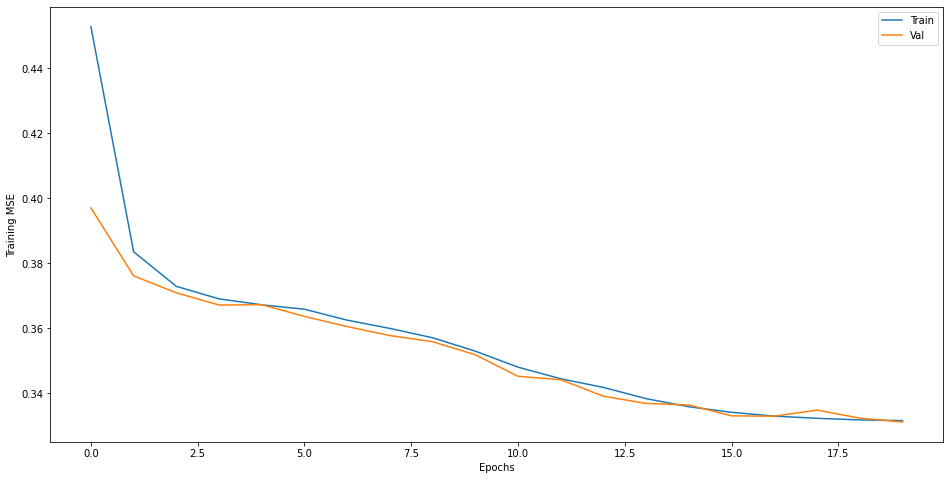

In [80]:
plt.figure(figsize=(16,8))
plt.plot(losses, label='Train')
plt.plot(val_losses, label='Val')
plt.xlabel("Epochs")
plt.ylabel("Training MSE")
plt.legend()
plt.show()

## C
Compare el score de cada modelo y comente lo necesario.

In [81]:
#https://www.kaggle.com/code/rsesha/fraud-detection-96-accuracy-very-easy
#Esta funcion nos permite ver la precision y el recall de manera muy rapido
def print_accuracy(modeltype, y_test, y_preds):
    target="isFraud"
    if modeltype == 'Regression':
        from sklearn.metrics import r2_score, mean_squared_error
        print('R-Squared = %0.0f%%' %(100*r2_score(y_test,y_preds)))
        print('RMSE = %0.2f' %np.sqrt(mean_squared_error(y_test,y_preds)))
    else:
        from sklearn.metrics import balanced_accuracy_score, classification_report
        if isinstance(target, str): 
            print('Bal accu %0.0f%%' %(100*balanced_accuracy_score(y_test,y_preds)))
            print(classification_report(y_test,y_preds))
        elif len(target) == 1:
                print('Bal accu %0.0f%%' %(100*balanced_accuracy_score(y_test,y_preds)))
                print(classification_report(y_test,y_preds))
        else:
            for each_i, target_name in enumerate(target):
                print('For %s:' %target_name)
                print('    Bal accu %0.0f%%' %(100*balanced_accuracy_score(y_test.values[:,each_i],y_preds[:,each_i])))
                print(classification_report(y_test.values[:,each_i],y_preds[:,each_i]))

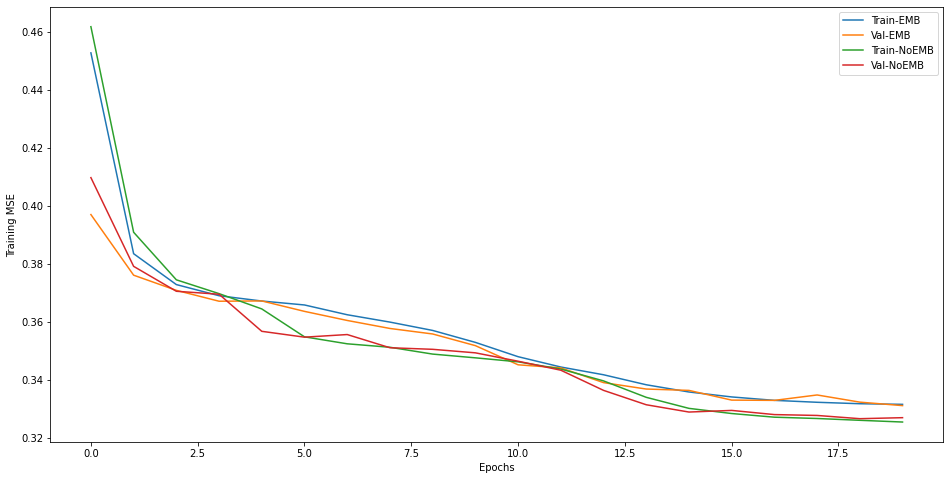

In [82]:
#Comparacion de resutlados
plt.figure(figsize=(16,8))
plt.plot(losses, label='Train-EMB')
plt.plot(val_losses, label='Val-EMB')
plt.plot(losses_noEMB, label='Train-NoEMB')
plt.plot(val_losses_noEMB, label='Val-NoEMB')
plt.xlabel("Epochs")
plt.ylabel("Training MSE")
plt.legend()
plt.show()


In [83]:
bar = tqdm(dataloader['test'])
y_hats_noEMB,y_hats_EMB = np.array([]),np.array([])
batchCounterVar=0
with torch.no_grad():
  for batch in bar:
    X, y = batch
    #X = X.float()
    user_ids=user_idx_test[batchCounterVar*64:(batchCounterVar+1)*64]
    user_ids=user_ids.to(device)
    prduct_ids=product_idx_test[batchCounterVar*64:(batchCounterVar+1)*64]
    prduct_ids=prduct_ids.to(device)
    X, y = X.to(device), y.to(device)
    y_hat_EMB = net(X,user_ids,prduct_ids)
    y_hat_noEMB = net_noEMB(X)
    #acc = (len(y) - (y - y_hat.abs()).abs().sum().item()) / len(y)
    #acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
    batchCounterVar+=1
    y_hats_noEMB=np.concatenate((y_hats_noEMB,y_hat_noEMB.detach().cpu().numpy().reshape(1,-1).round().astype(int).flatten()))
    y_hats_EMB=np.concatenate((y_hats_EMB,y_hat_EMB.detach().cpu().numpy().reshape(1,-1).round().astype(int).flatten()))


  0%|          | 0/2579 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 2579/2579 [00:03<00:00, 812.48it/s]


In [84]:
np.bincount(y_hats_EMB.astype(int)-np.array(Y_test).flatten().astype(int)+1)

array([ 10197, 141755,  13069])

In [85]:
print_accuracy(None,np.array(Y_test).flatten().astype(int),y_hats_EMB.astype(int))

Bal accu 86%
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     99273
           1       0.81      0.84      0.83     65748

    accuracy                           0.86    165021
   macro avg       0.85      0.86      0.85    165021
weighted avg       0.86      0.86      0.86    165021



In [86]:
print_accuracy(None,np.array(Y_test).flatten().astype(int),y_hats_noEMB.astype(int))

Bal accu 86%
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     99273
           1       0.81      0.85      0.83     65748

    accuracy                           0.86    165021
   macro avg       0.85      0.86      0.86    165021
weighted avg       0.86      0.86      0.86    165021



Podemos ver que ambos metodos performan correctamente,  ya que el f1 score balanceado es 0.86 para ambos, tambien podemos ver en la loss que ambos performan muy parecido. Es probable que con mas epochs pueda mejorar la performance, pero ya una precision como la que tenemos ahora es suficiente.

# Punto 4 
Se tiene la función y = a * log(b) + b * c^2. Calcular las derivadas de y respecto a los parámetros a, b, c, evaluando en los valores a=2, b=10, c=0.5. Se deben calcular las derivadas por los siguientes métodos

## D
Utilizando PyTorch (automatic differentiation).

In [87]:
a=torch.tensor(2., requires_grad=True)
b=torch.tensor(10., requires_grad=True)
c=torch.tensor(0.5, requires_grad=True)

In [88]:
y=(a*torch.log(b))+(b*torch.pow(c, 2))

In [89]:
y.backward()

In [90]:
print(a.grad,b.grad,c.grad)

tensor(2.3026) tensor(0.4500) tensor(10.)
